All reactions

In [72]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [73]:

coil_currents = [2, 3, 5, 10, 15, 20, 25, 30, 35, 40]
power_absorbed = []
Le=[]
LXe=[]
LXe_ion=[]
LTe=[]
LTXe=[]
L_thrust_ion =[]
L_thrust_neutral = []
L_thrust_total = []
tracked_variables = {}
for i in range(len(coil_currents)):
    log_file_path = '../logs/all_reac_current'+str(i)+'.json'
    print(log_file_path)
    with open(log_file_path, 'r') as file:
        tracked_variables = json.load(file)
    Le.append(tracked_variables["e_density"][-1])
    LXe.append(tracked_variables["Xe_density"][-1])
    LXe_ion.append(tracked_variables["Xe+_density"][-1])
    LTe.append(tracked_variables['temperature_0_atom'][-1])
    LTXe.append(tracked_variables['temperature_1_atom'][-1])
    L_thrust_ion.append(tracked_variables['total_ion_thrust'][-1])
    L_thrust_neutral.append(tracked_variables['total_neutral_thrust'][-1])
    L_thrust_total.append(tracked_variables['total_thrust'][-1])
    power_absorbed.append(tracked_variables['power_absorbed'][-1])


../logs/all_reac_current0.json
../logs/all_reac_current1.json
../logs/all_reac_current2.json
../logs/all_reac_current3.json
../logs/all_reac_current4.json
../logs/all_reac_current5.json
../logs/all_reac_current6.json
../logs/all_reac_current7.json
../logs/all_reac_current8.json
../logs/all_reac_current9.json


In [74]:
power_list = []
R_ind_list=[]
zeta_list=[]
for i in range(len(power_absorbed)):
    R_ind = power_absorbed[i] * 2 / coil_currents[i]**2
    R_ind_list.append(R_ind)
    zeta = R_ind / (R_ind + 2)
    zeta_list.append(zeta)
    power_list.append(power_absorbed[i]/zeta)

In [75]:
print(LXe)
print(len(Le))
print(len(power_list))

[5.871195629562373e+19, 5.734792617526334e+19, 5.455620544102988e+19, 4.7755056219053015e+19, 4.174284711548606e+19, 3.65826858221537e+19, 3.215394869951923e+19, 2.8331579045612052e+19, 2.501562601461304e+19, 2.212971035200438e+19]
10
10


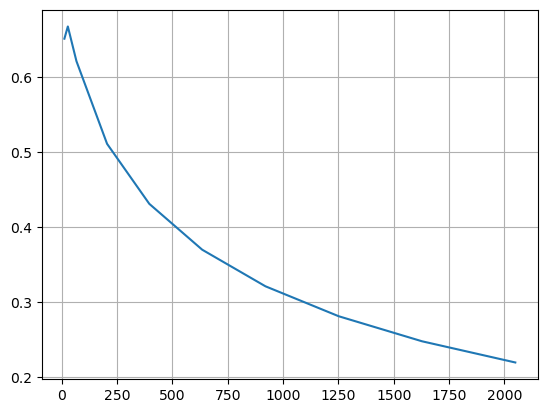

In [76]:
plt.plot(power_list, zeta_list)
plt.grid()

C:\Users\verdi\AppData\Local\Temp\ipykernel_17832\842785262.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


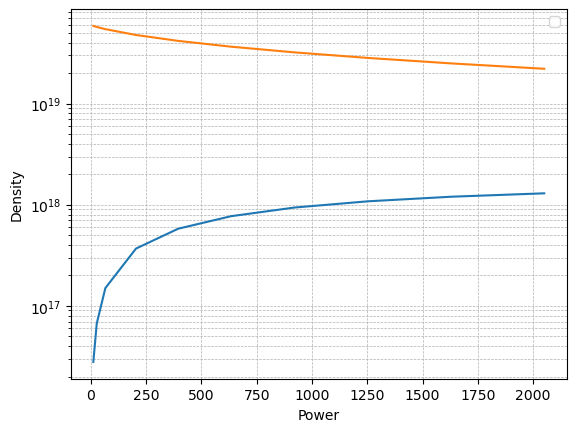

In [77]:
from matplotlib.ticker import LogLocator

x=power_list
y=Le
z=LXe

fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,z)

ax.set_yscale('log')

ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0, ), numticks=10))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# plt.plot(x, y, label="electron density")
# plt.grid()
# plt.yscale('log')
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

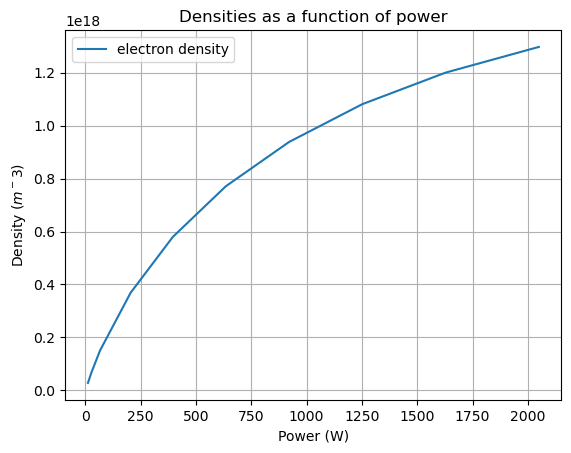

In [78]:
plt.plot(x, y, label="electron density")
plt.grid()
plt.xlabel("Power (W)")
plt.ylabel(f"Density ($m^{-3}$)")
plt.title("Densities as a function of power")
plt.legend()

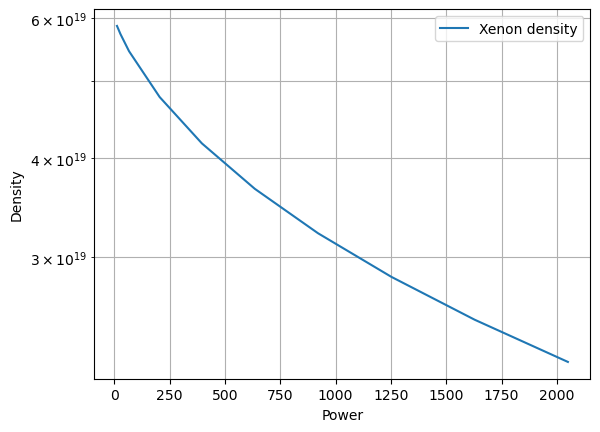

In [79]:
plt.plot(x, LXe, label="Xenon density")
plt.grid(True, which='both')
plt.yscale('log')
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

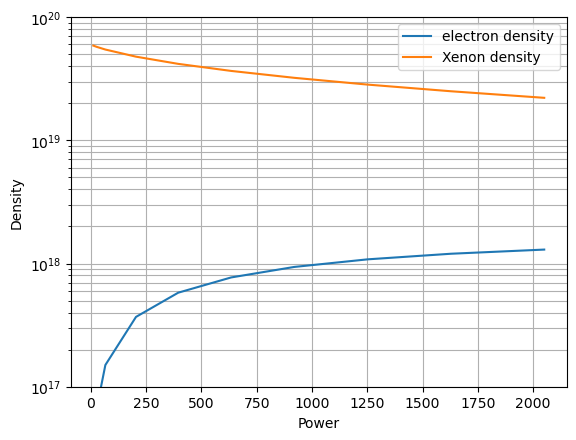

In [80]:
plt.plot(x, y, label="electron density")
plt.plot(x, LXe, label="Xenon density")
plt.ylim(1e17, 1e20)
plt.grid(True, which='both')
plt.yscale('log')
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

In [81]:
from scipy.constants import k, e, pi
import matplotlib.pyplot as plt

def plot_variables(var_list1, var_list2):
    """
    Plots the evolution of variables from tracked_variables with 'time' on the x-axis.
    The first list of variables is plotted on the primary y-axis, and the second list on a secondary y-axis.

    Parameters:
    var_list1 (list): List of variable names to plot on the primary y-axis.
    var_list2 (list): List of variable names to plot on the secondary y-axis.
    """
    
    fig, ax1 = plt.subplots()

    # Plot variables from var_list1 on the primary y-axis
    ax1.plot(power_list, var_list1, label="electron temperature")
    ax1.set_xlabel('Power')
    ax1.set_ylim(2.4, 5)
    ax1.set_ylabel('Electron temperature')
    ax1.grid()

    # #Vérification du temps de relaxation:
    # tau=7.9e-3
    # T_init=3
    # L=[tangente(t,T_init,tau) for t in time]

    # Create a secondary y-axis
    L=[v*e/k for v in var_list2]
    ax2 = ax1.twinx()
    ax2.plot(power_list, L, 'g', label="Xenon temperature")
    # ax2.plot(L,label="tangente à l'orgine")
    ax2.set_ylabel('Xenon Temperature (K)')

    ax2.legend(loc='best')

    # x_vert=7.9e-3
    # plt.axvline(x_vert, color='r', linestyle='--')

    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    ax2.legend(lines_2 + lines_1, labels_2 + labels_1, loc='best')

    plt.title('Evolution of Variables')
    plt.show()

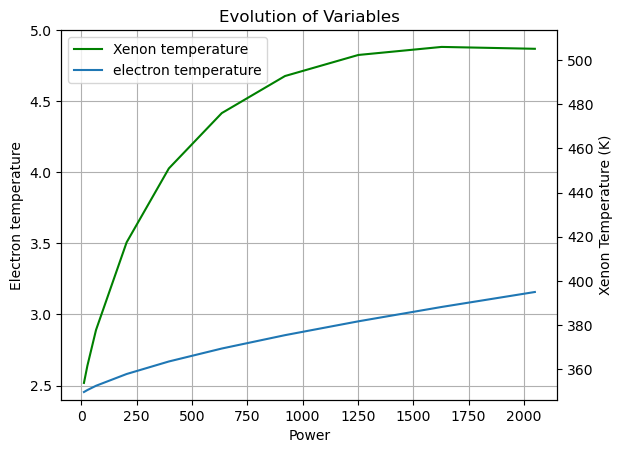

In [82]:
plot_variables(LTe,LTXe)

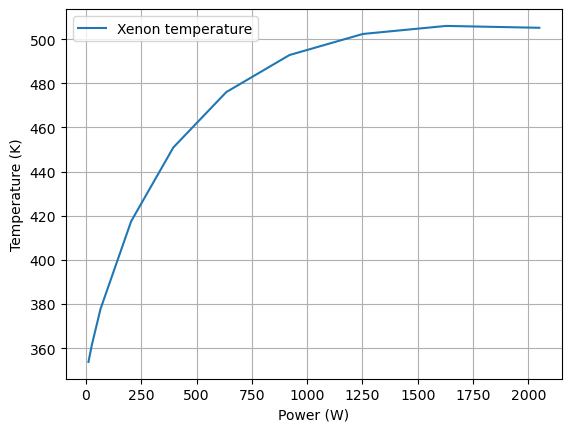

In [83]:
#plt.plot(power_list,LTe, label="electron temperature")
L=[v*e/k for v in LTXe]
plt.plot(power_list,L, label="Xenon temperature")
plt.grid()
plt.xlabel("Power (W)")
plt.ylabel("Temperature (K)")
plt.legend()

3.157779712942417


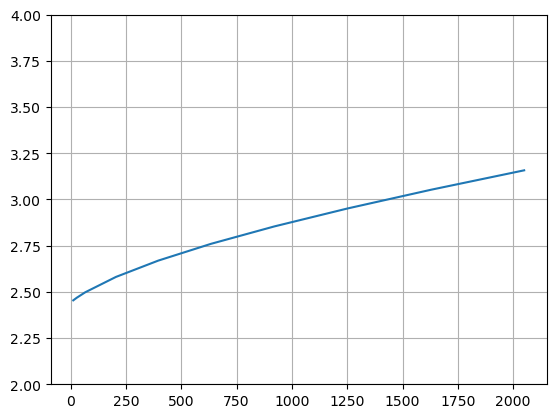

In [84]:
plt.plot(power_list, LTe)
plt.grid()
plt.ylim(2, 4)
print(LTe[-1])

- Max des Températures du Xénon: 505 K, ce qui est un peu bas (plutôt proche du 520 K)
- Min des Températures du Xénon: 347 K, ce qui est un peu haut (plutôt proche du 300 K)

Températures finales de l'électron:
- plus de 3.5 eV ce qui est un peu haut
- le min a l'air cohérent

In [85]:
print(LTXe)
print(LTe)

[0.030484190260794814, 0.03115578122564312, 0.03254890017376005, 0.03597301632673345, 0.03885944148083456, 0.04102018661160541, 0.04246736907889204, 0.04328968634410036, 0.0436038789350561, 0.043531012507562285]
[2.4542049560814285, 2.4681311383225166, 2.4981069860358285, 2.580916234262584, 2.66904982119496, 2.760175205555322, 2.8541724372269868, 2.9514673546674963, 3.0525423010042925, 3.157779712942417]


ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

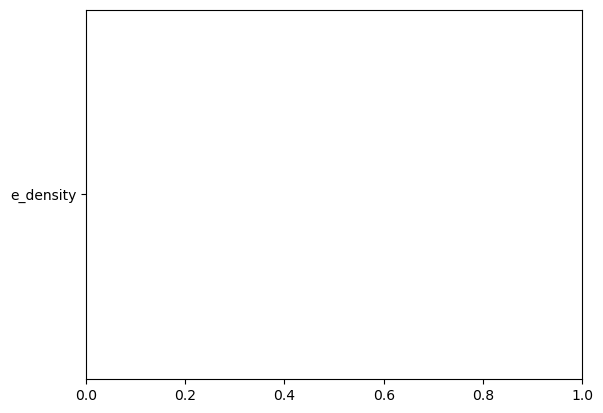

In [86]:
plot_variables(['e_density','Xe_density', 'Xe+_density'], [])
plot_variables(['e_density'], ['Xe_density'])
plot_variables(['dy_e_density'], ['dy_Xe_density', 'dy_Xe+_density'])
plot_variables(['Xe+_density'],[])
plot_variables(['e_density'],[])

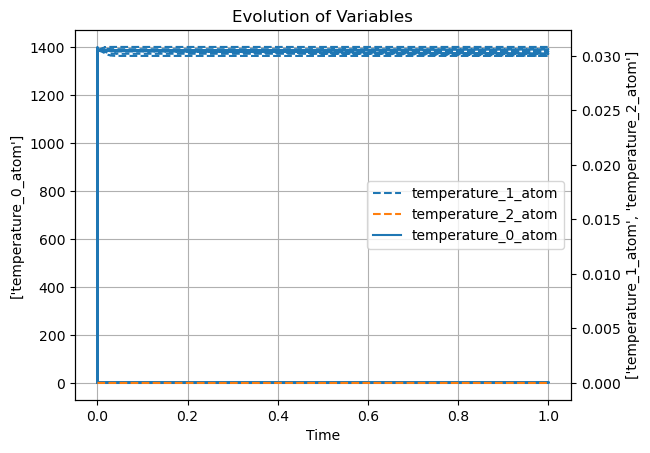

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


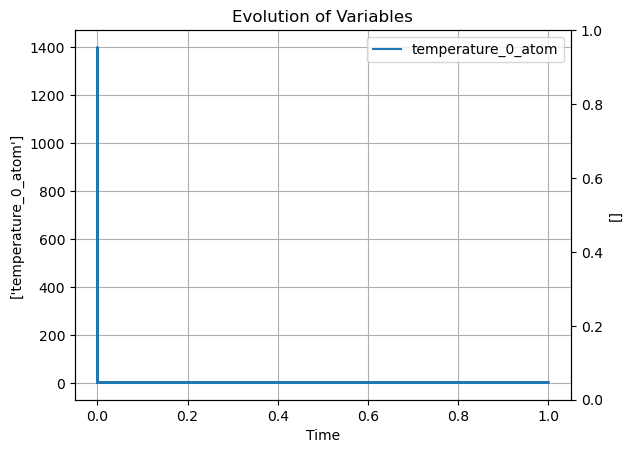

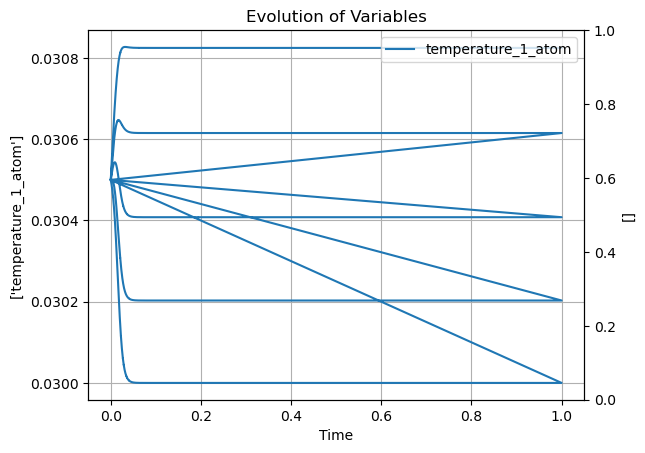

In [ ]:
plot_variables(["temperature_0_atom"], ["temperature_1_atom", "temperature_2_atom"])
#plot_variables(["dy_temperature_0_atom"], ["dy_temperature_1_atom", "dy_temperature_2_atom"])
plot_variables(["temperature_0_atom"],[])
plot_variables(["temperature_1_atom"],[])


Asymptote horizontale à la température des électrons = 0.054 eV d'après la simu json. Donc cohérent avec valeur théorique.

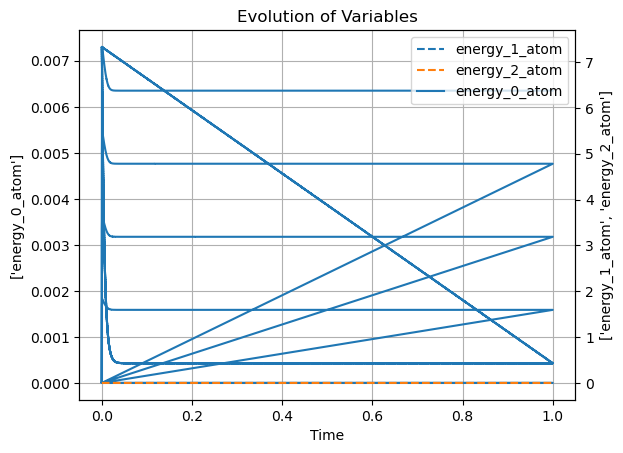

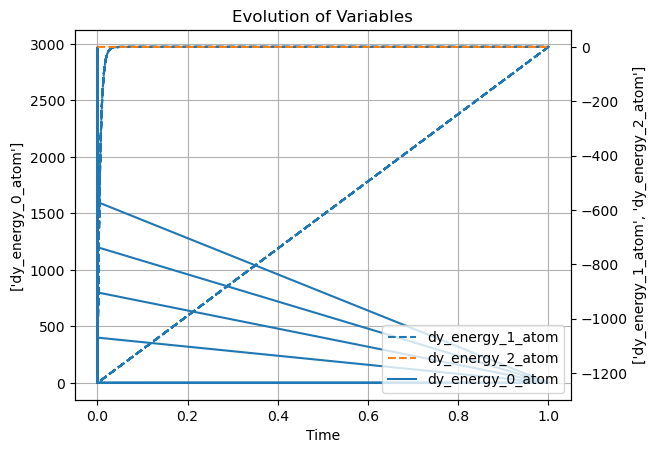

In [ ]:
plot_variables(['energy_0_atom'], ['energy_1_atom', 'energy_2_atom'])
plot_variables(['dy_energy_0_atom'], ['dy_energy_1_atom', 'dy_energy_2_atom'])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


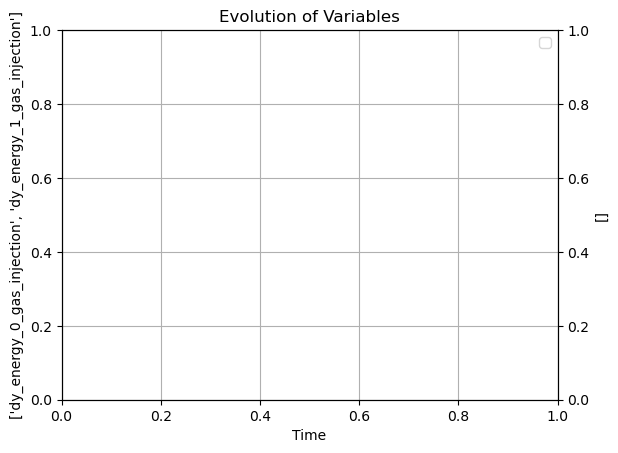

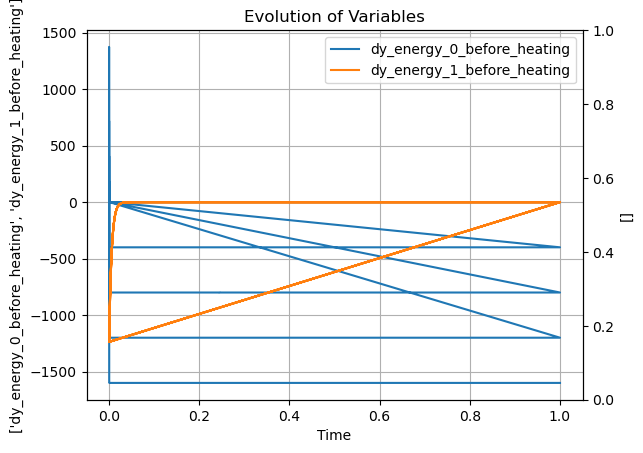

In [ ]:
plot_variables(['dy_energy_0_gas_injection', 'dy_energy_1_gas_injection'], [])
plot_variables(['dy_energy_0_before_heating', 'dy_energy_1_before_heating'], [])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


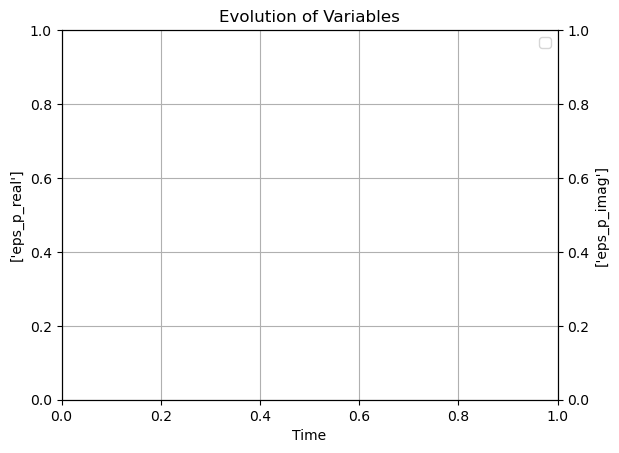

In [ ]:
plot_variables(["eps_p_real"], ["eps_p_imag"])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


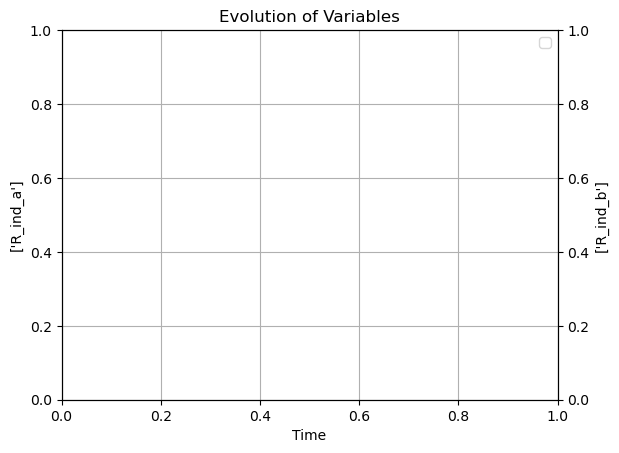

In [ ]:
plot_variables(["R_ind_a"], ["R_ind_b"])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


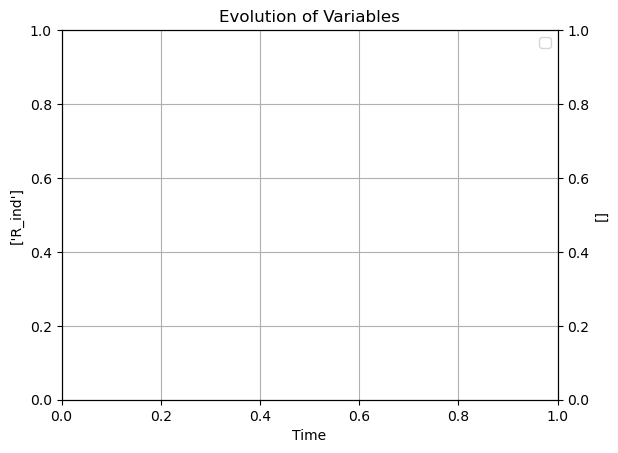

In [ ]:
plot_variables(["R_ind"], [])